# Importing Libraries

In [3]:
import numpy as np 
import pandas as pd 

# Libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# Libraries for Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer

# Machine Learning Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC






# Libraries for Metrics
from sklearn.metrics import accuracy_score, confusion_matrix

import os
for dirname, _, filenames in os.walk('/heart.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
data = pd.read_csv('heart.csv')
print("Number of rows in the dataset: {}".format(data.shape[0]))
print("Number of cols in the dataset: {}".format(data.shape[1]))

Number of rows in the dataset: 918
Number of cols in the dataset: 12


In [5]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,F,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,F,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,F,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
data.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
Age,918.000000,53.510893,9.432617,28.000000,47.000000,54.000000,60.000000,77.000000
RestingBP,918.000000,132.396514,18.514154,0.000000,120.000000,130.000000,140.000000,200.000000
Cholesterol,918.000000,198.799564,109.384145,0.000000,173.250000,223.000000,267.000000,603.000000
FastingBS,918.000000,0.233115,0.423046,0.000000,0.000000,0.000000,0.000000,1.000000
MaxHR,918.000000,136.809368,25.460334,60.000000,120.000000,138.000000,156.000000,202.000000
Oldpeak,918.000000,0.887364,1.066570,-2.600000,0.000000,0.600000,1.500000,6.200000
HeartDisease,918.000000,0.509804,0.500176,0.000000,0.000000,1.000000,1.000000,1.000000


Cardinality of data

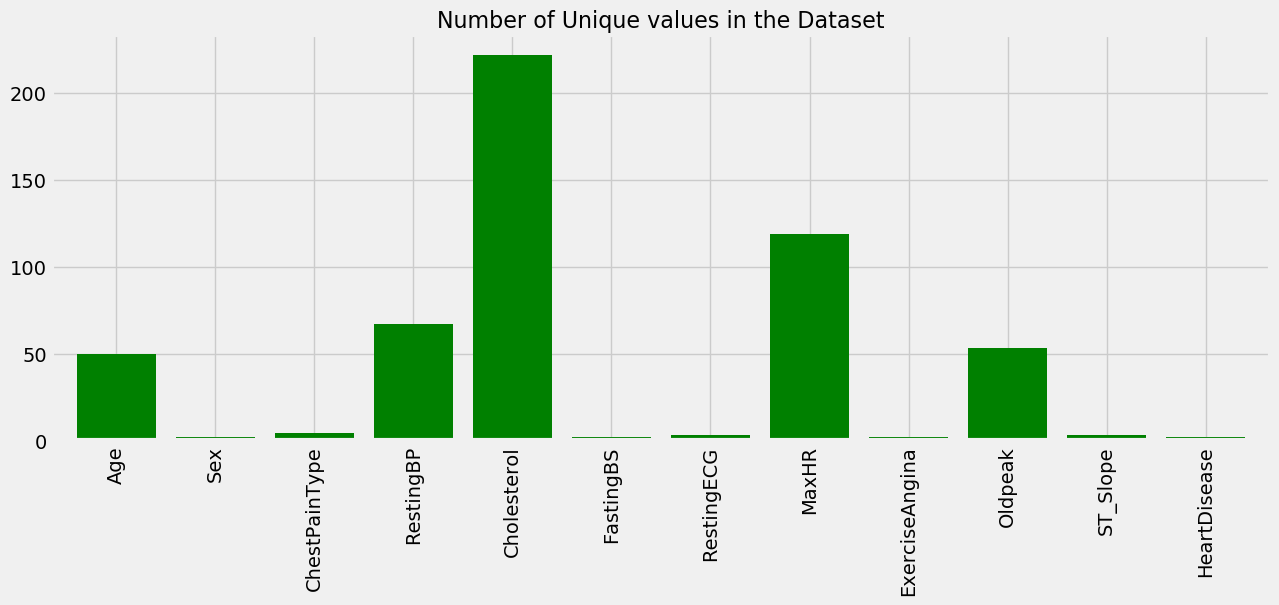

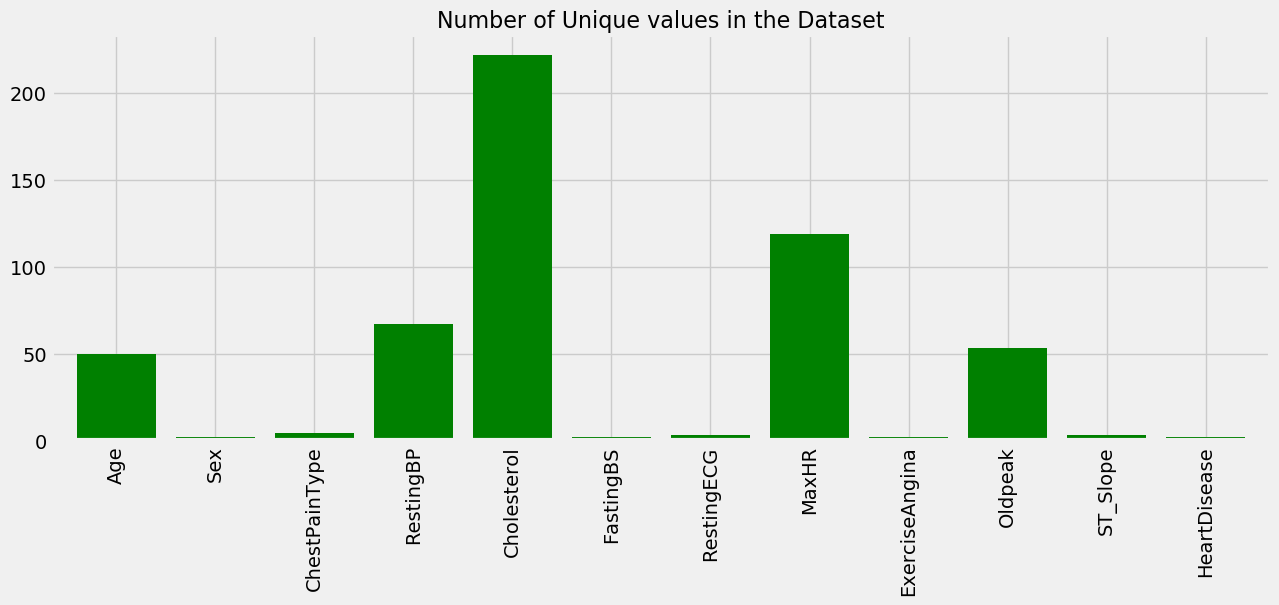

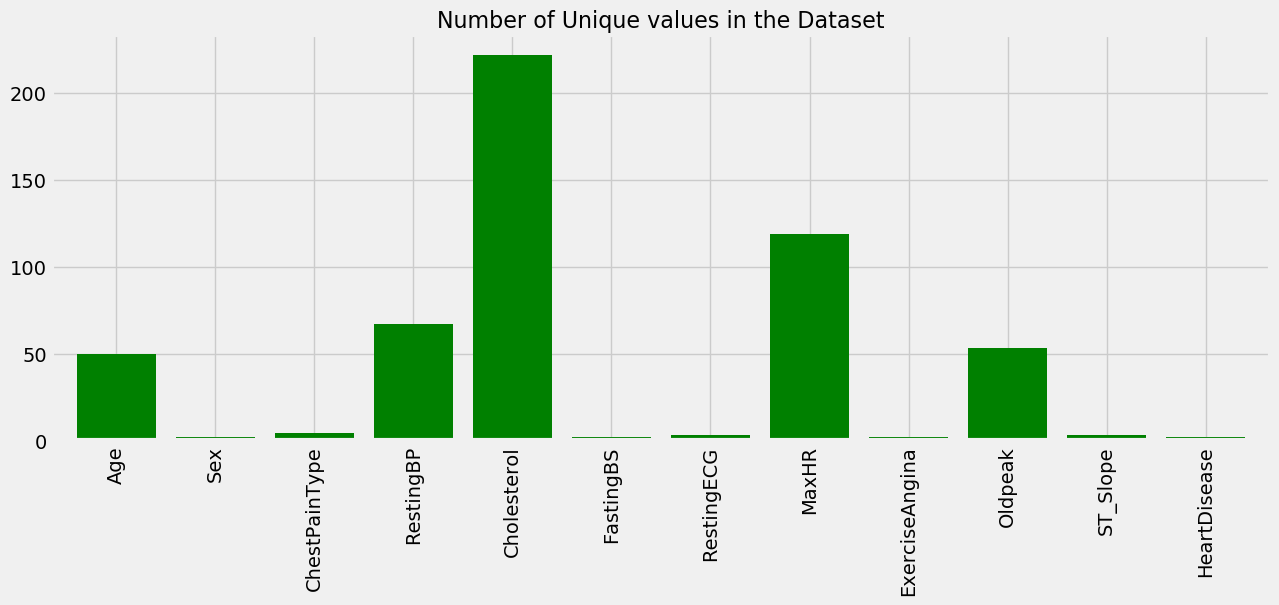

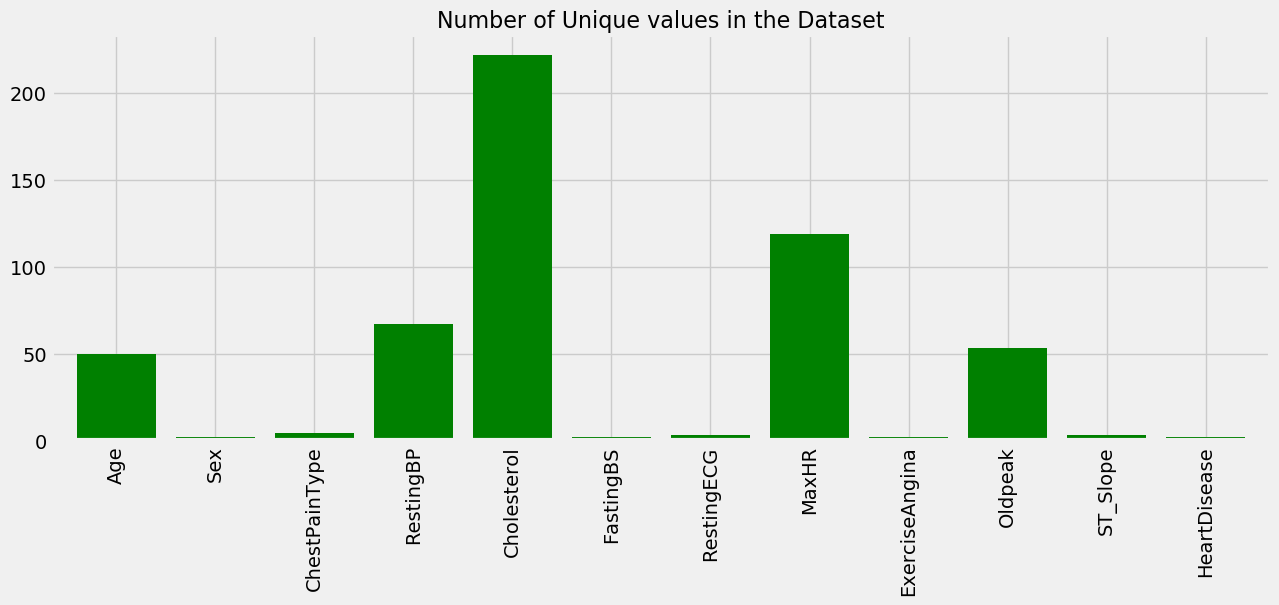

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64


In [11]:
color = plt.cm.copper(np.linspace(0, 1, 10))
plt.figure(figsize=(14,5))
data.nunique().plot(kind='bar', width=.8, color='Green')
plt.title('Number of Unique values in the Dataset', size=16)
#plt.savefig('Unique values of dataset.jpeg')
plt.show()
print(data.nunique())


Seperating the data into discrette features and continuous feat

In [12]:
discrette_feature = [i for i in data.columns if data[i].nunique() < 10]
continuous_feature = [i for i in data.columns if data[i].nunique() > 10]
print(f'discrette feature: {discrette_feature}')
print(f'continuous feature: {continuous_feature}')

discrette feature: ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
continuous feature: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


Visualising discrette feature with output variable count plot

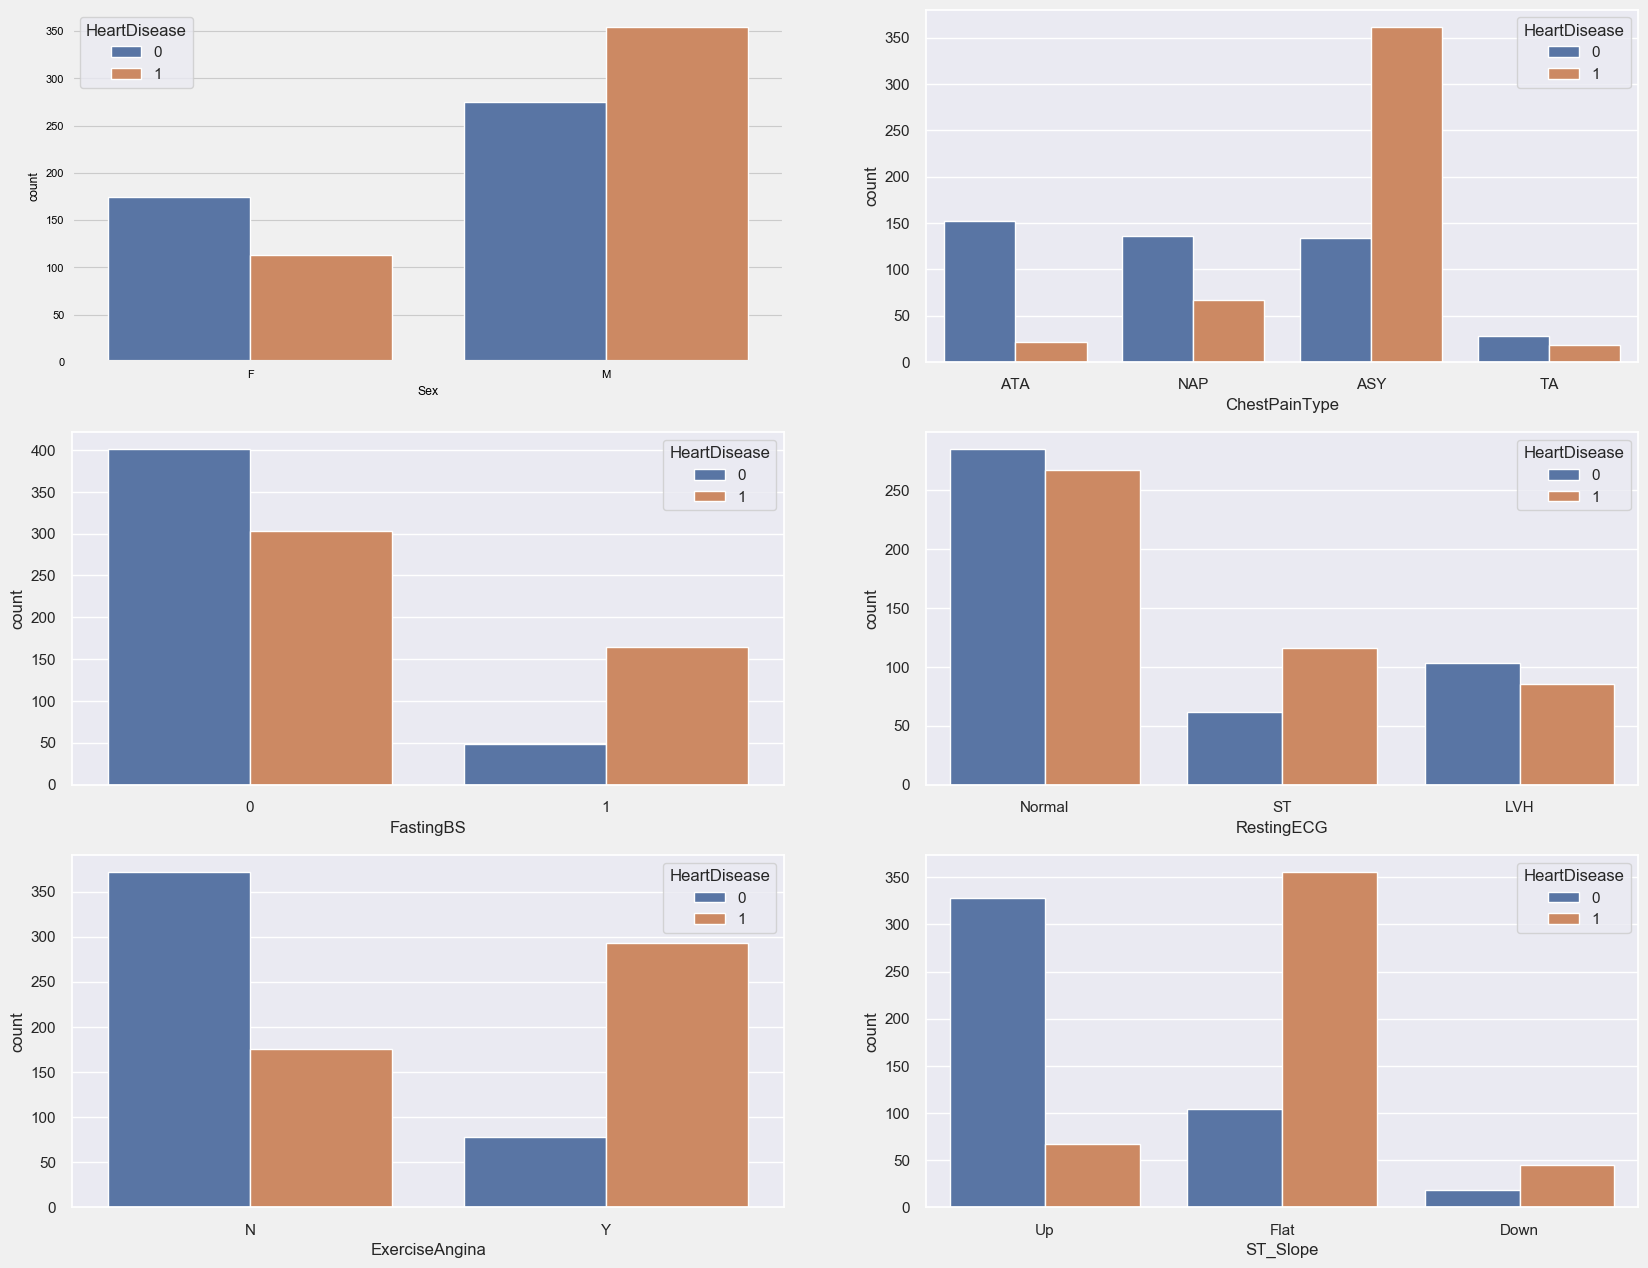

In [13]:
plt.style.use(plt.style.available[19])
i = 1
plt.figure(figsize=(18,20)) 
for feature in discrette_feature[:-1]:
    plt.subplot(4, 2, i)
    sns.set(color_codes=True)
    sns.countplot(x=data[feature], hue=data.HeartDisease)
    i += 1
    
plt.show()

visualising continuous features with output variable using histogram and kde

/Users/nvsp/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/nvsp/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/nvsp/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Users/nvsp/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dime

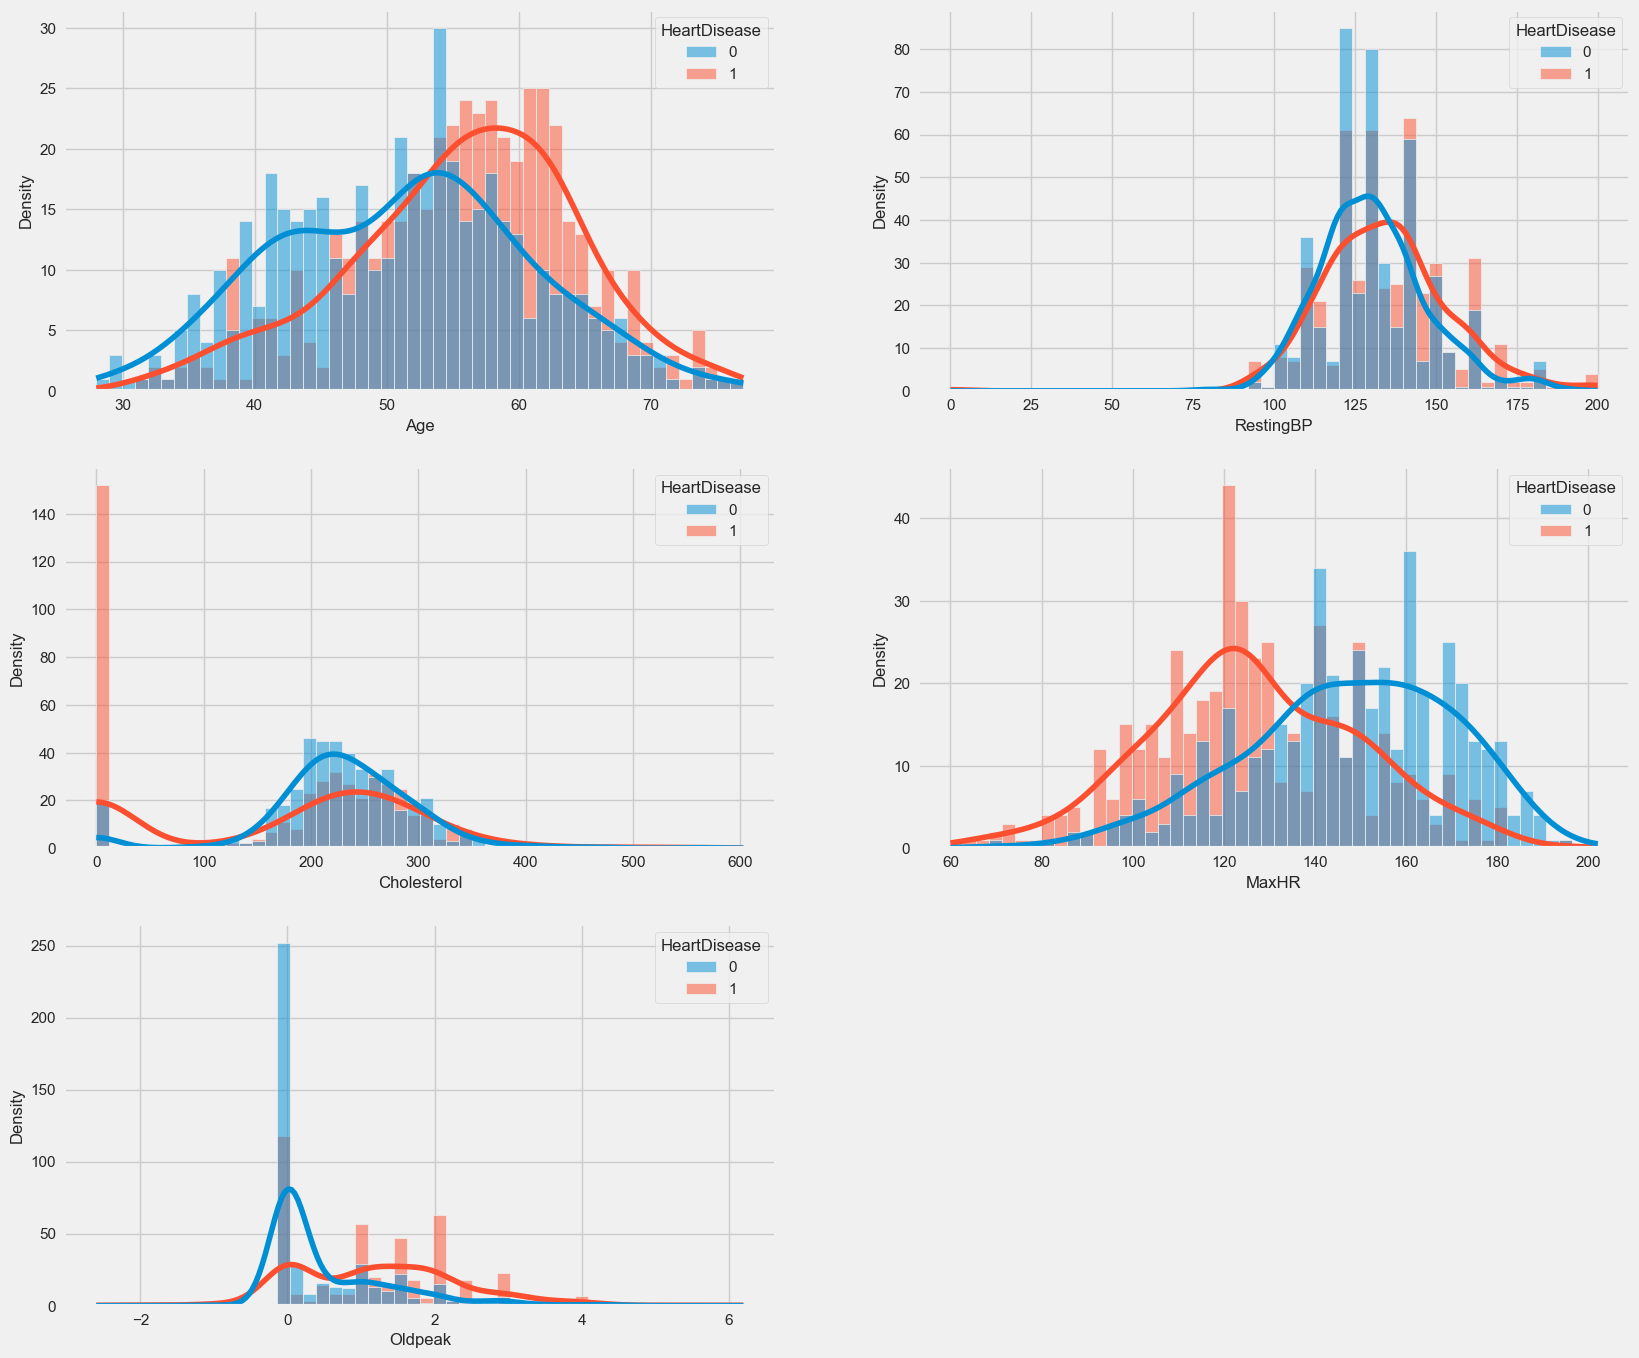

In [41]:
plt.style.use('fivethirtyeight')
i = 1
plt.figure(figsize=(18, 16)) 
for feature in continuous_feature:
    plt.subplot(3, 2, i)
    
    # Convert the feature data to numpy array
    feature_data = data[feature].values
    
    sns.histplot(x=feature_data, kde=True, bins=50, hue=data['HeartDisease'].astype(str))
    plt.xlabel(feature, size=12)
    plt.ylabel("Density", size=12)
    i += 1
    
plt.show()

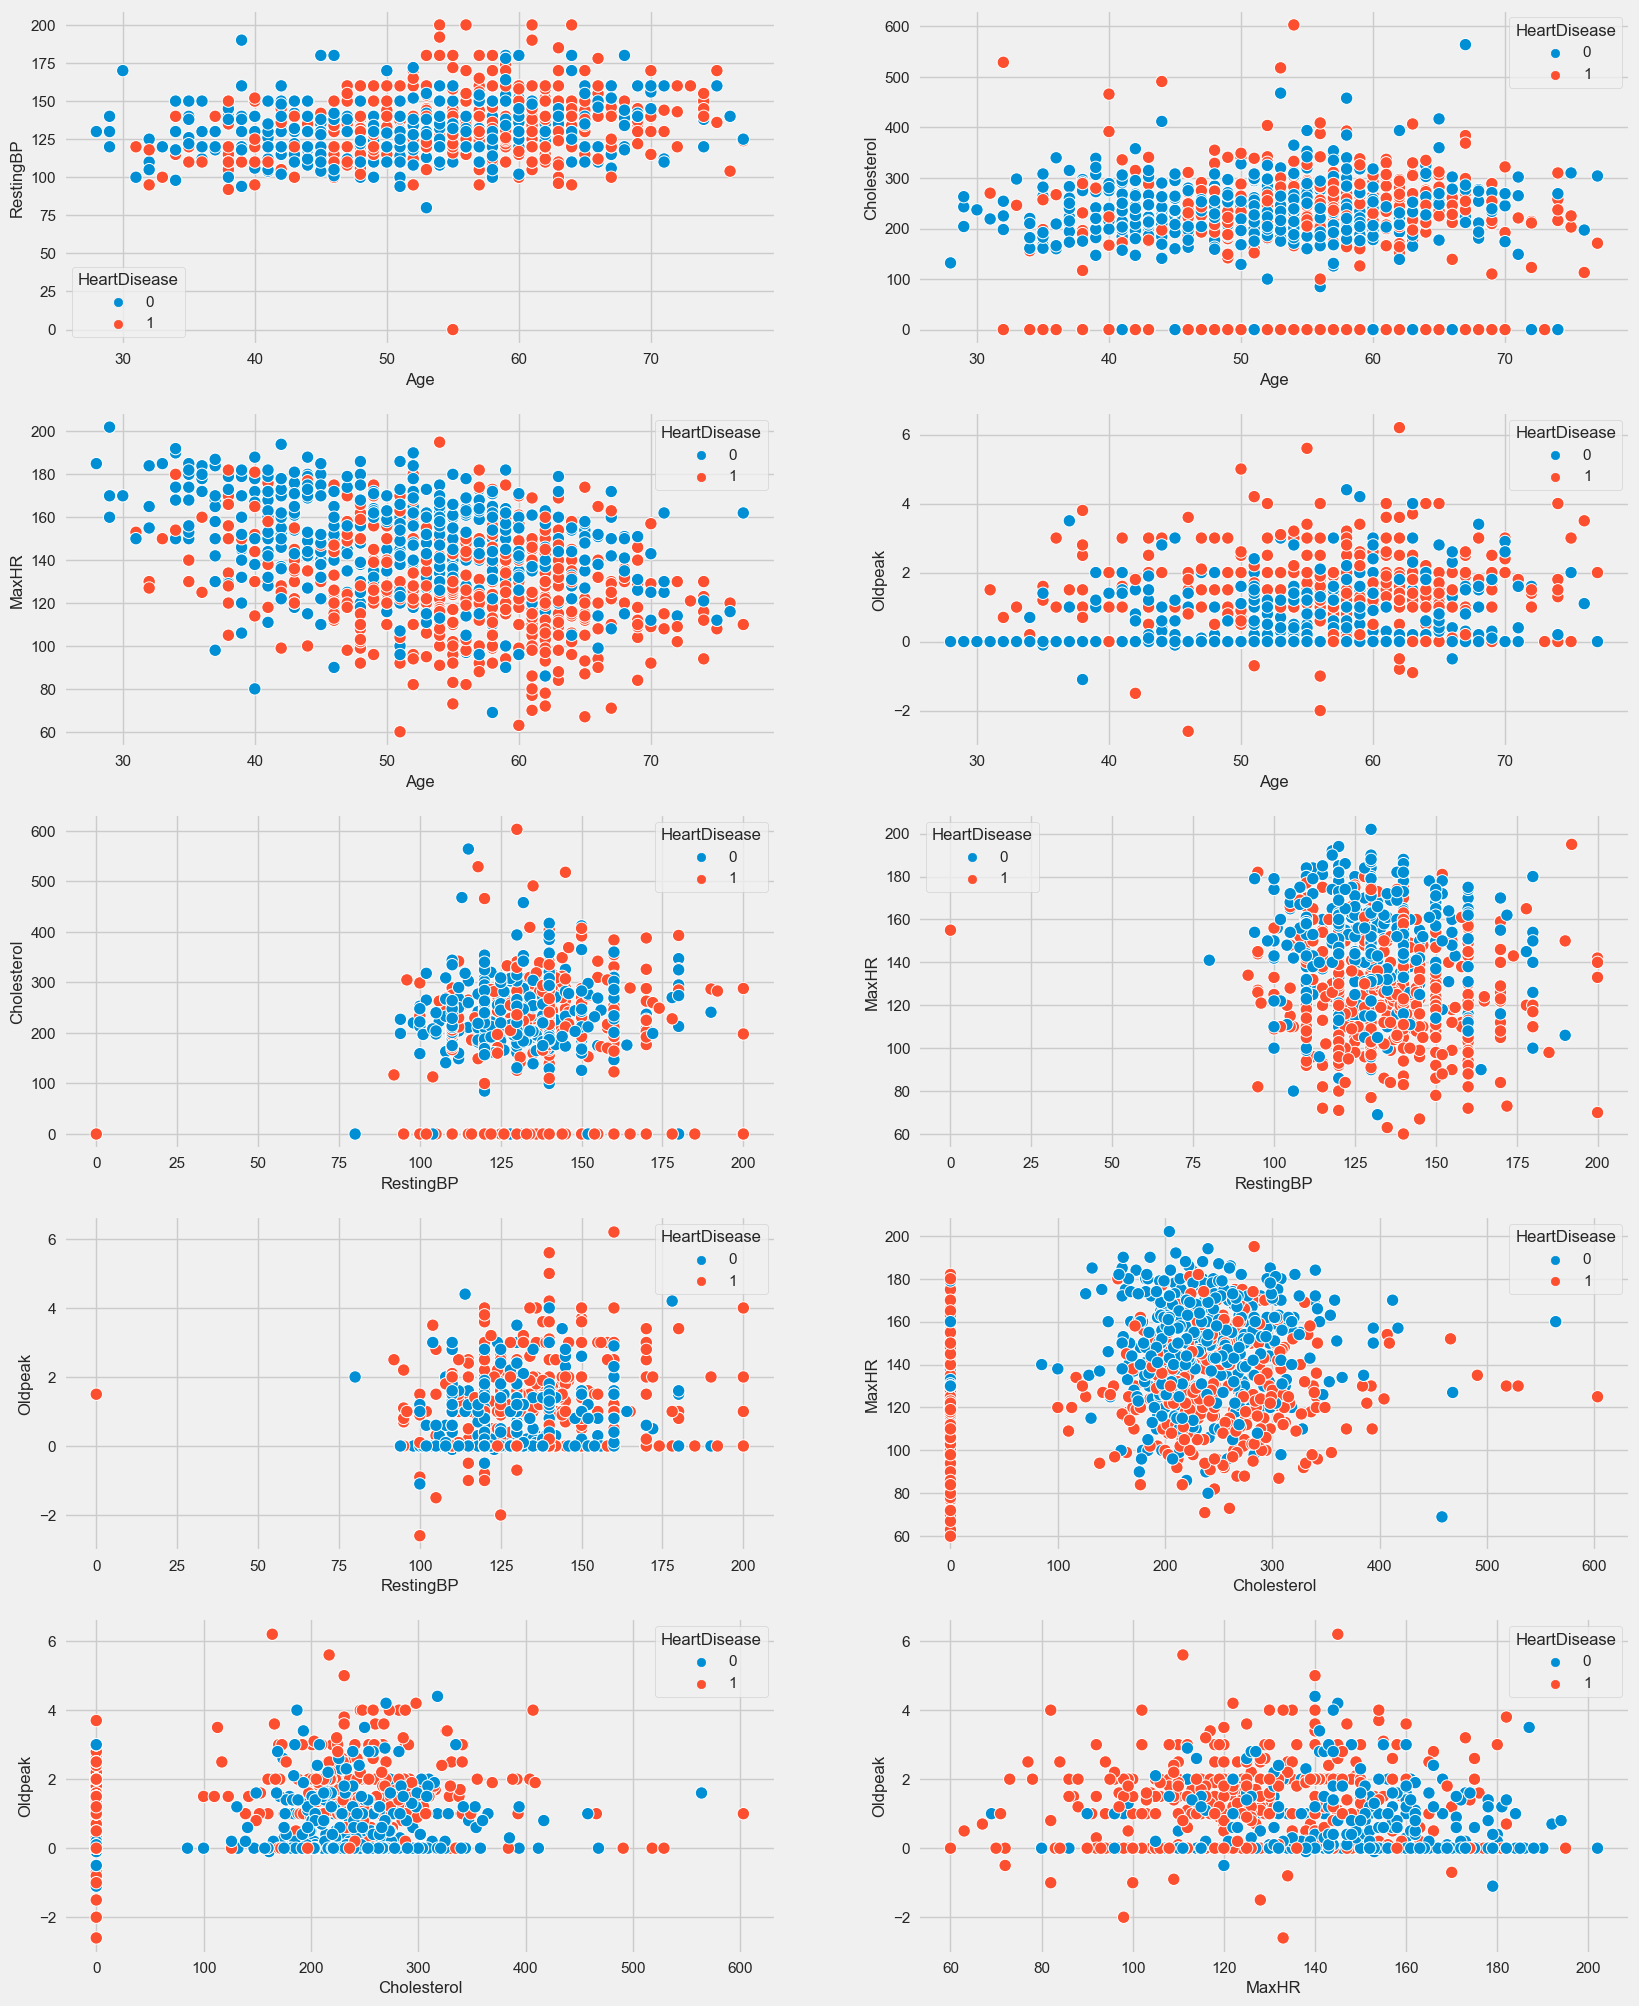

In [17]:
i = 1
n = 1
plt.figure(figsize=(18,24)) 
for feature in continuous_feature:
    for i_ in continuous_feature[n:]:
        plt.subplot(5, 2, i)
        sns.scatterplot(x=data[feature],y=data[i_], s=80, hue=data.HeartDisease)
        plt.xlabel(feature,size=12)
        plt.ylabel(i_,size=12)
        i += 1
    n+=1
plt.show()      

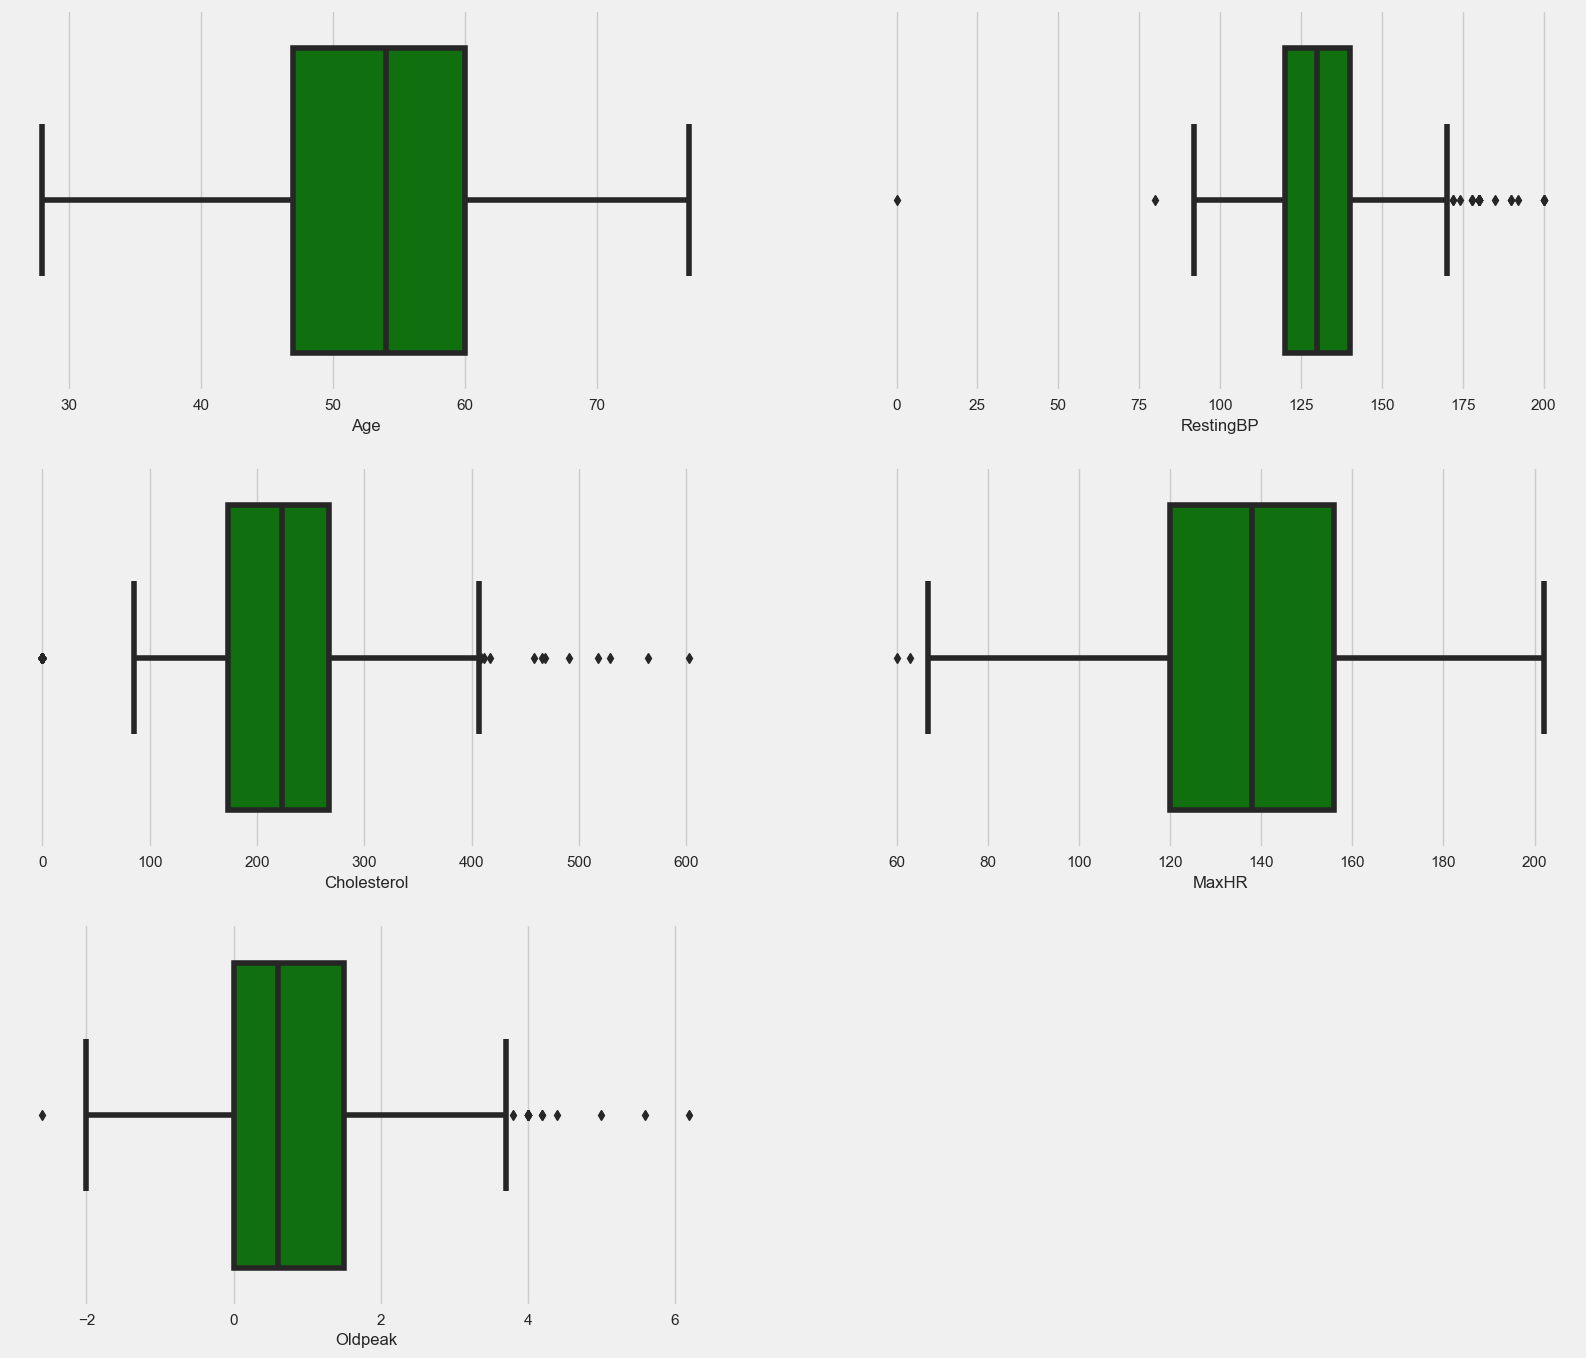

In [18]:
plt.style.use('fivethirtyeight')
i = 1
plt.figure(figsize=(18,16)) 
for feature in continuous_feature:
    plt.subplot(3, 2, i)
    sns.boxplot(data=data, x=feature, hue='HeartDisease', color='green')
    plt.xlabel(feature,size=12)
#     plt.ylabel("Density",size=12)
    i += 1

plt.show()


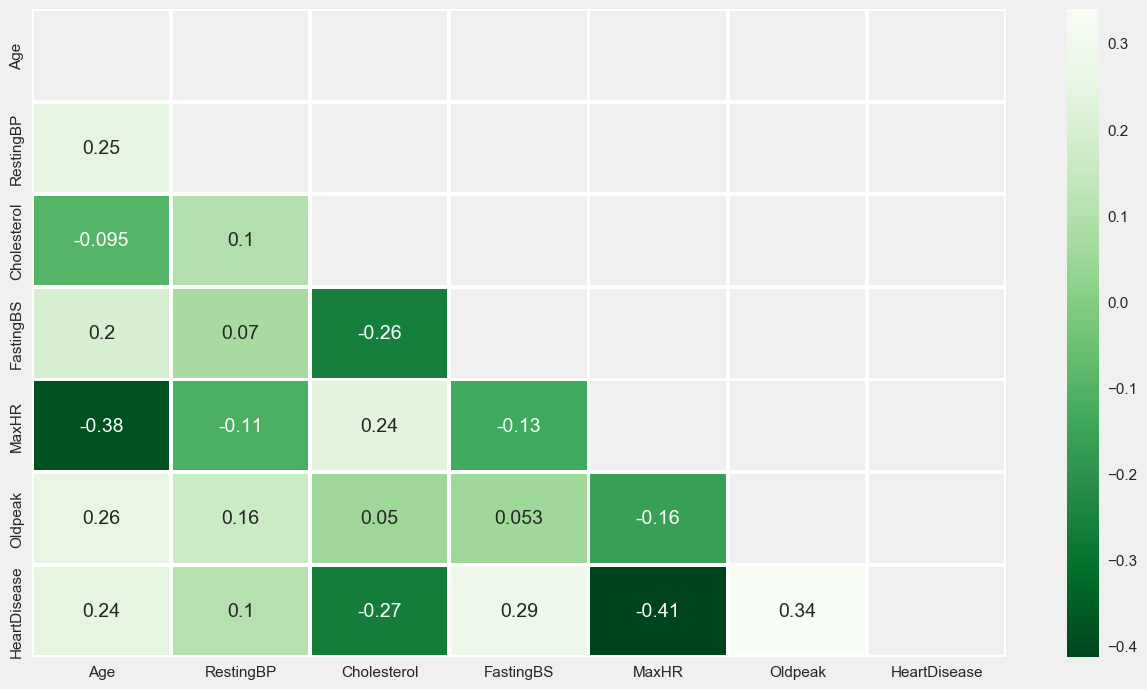

In [19]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(), mask=np.triu(data.corr()), annot=True, cmap='Greens_r',linewidth=2)
plt.show()

# Data Preprocessing

In [20]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,F,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,F,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,F,NAP,150,195,0,Normal,122,N,0.0,Up,0


seperating input features and output features

In [21]:
X = data.drop(columns=['HeartDisease'])
y = data['HeartDisease']

splitting the data for training and testing

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=25)
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_test shape : {x_test.shape}')
print(f'y_test shape : {y_test.shape}')

x_train shape: (734, 11)
y_train shape: (734,)
x_test shape : (184, 11)
y_test shape : (184,)


Applying One Hot Encoding and standardization using column transformer

In [23]:
transformer = ColumnTransformer(transformers = [('onehot', OneHotEncoder(sparse=False, drop='first'), [1,2,6,8,10]),
                                                ('scaler', StandardScaler(), [0,3,4,5,7,9])],
                                      remainder = 'passthrough')
x_train = transformer.fit_transform(x_train)
x_test = transformer.transform(x_test)

# Model Building

In [24]:
def do_prediction(classifier):
    
    # training the classifier on the dataset
    classifier.fit(x_train, y_train)
    
    #Do prediction and evaluting the prediction
    prediction = classifier.predict(x_test)
    cross_validation_score = cross_val(x_train,y_train, classifier)
    accuracy = accuracy_score(y_test, prediction)
    con_metrix = confusion_matrix(y_test, prediction)
    
    return accuracy,con_metrix, cross_validation_score

def cross_val(x_train, y_train, classifier):
    
    # Applying k-Fold Cross Validation
    accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 5)
    return accuracies.mean()

Logistic Regression

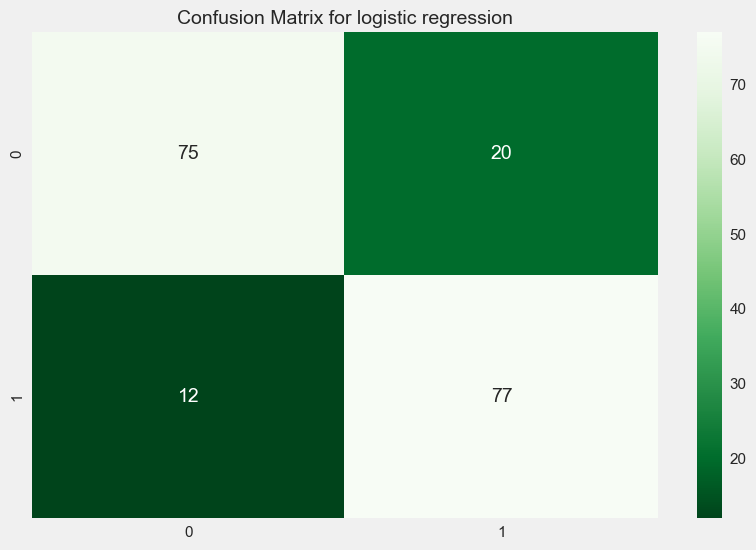

Logistic Regression Performace on the training data have an accuracy score of 84.0
Logistic Regression Performace on the testing data have an accuracy score of 83.0


In [25]:
logistic_reg = LogisticRegression()
accuracy,con_metrix, cross_validation_score = do_prediction(logistic_reg)

plt.figure(figsize=(9,6))
sns.heatmap(con_metrix, annot=True, cmap='Greens_r')
plt.title('Confusion Matrix for logistic regression',size=14)

plt.show()

print('Logistic Regression Performace on the training data have an accuracy score of {}'.format((cross_validation_score *100).round()) )
print('Logistic Regression Performace on the testing data have an accuracy score of {}'.format((accuracy *100).round()) )

Naive Bayes

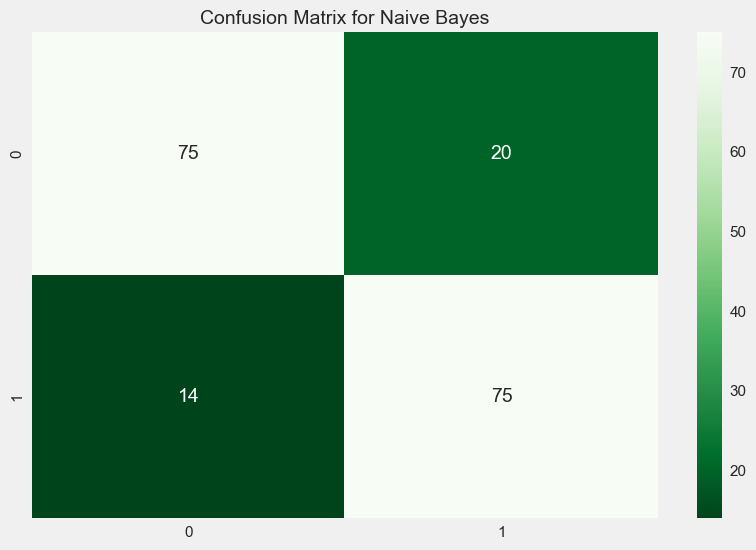

Naive Bayes Performace on the training data have an accuracy score of 84.0
Naive Bayes Performace on the testing data have an accuracy score of 82.0


In [26]:
gaussian = GaussianNB()
accuracy,con_metrix, cross_validation_score = do_prediction(gaussian)

plt.figure(figsize=(9,6))
sns.heatmap(con_metrix, annot=True, cmap='Greens_r')
plt.title('Confusion Matrix for Naive Bayes',size=14)

plt.show()
print('Naive Bayes Performace on the training data have an accuracy score of {}'.format((cross_validation_score *100).round()) )
print('Naive Bayes Performace on the testing data have an accuracy score of {}'.format((accuracy *100).round()) )

Support Vector Machine

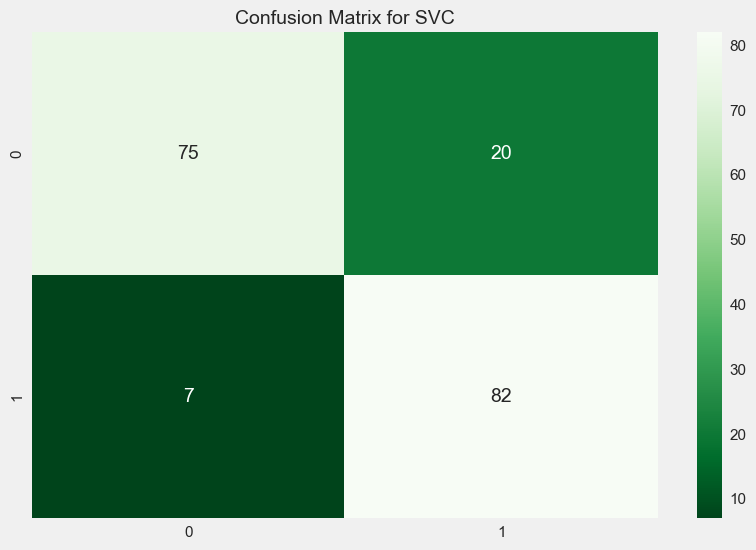

Support Vector Machine Performace on the training data have an accuracy score of 83.0
Support Vector Machine Performace on the testing data have an accuracy score of 85.0


In [27]:
svm = SVC()
accuracy,con_metrix, cross_validation_score = do_prediction(svm)

plt.figure(figsize=(9,6))
sns.heatmap(con_metrix, annot=True, cmap='Greens_r')
plt.title('Confusion Matrix for SVC',size=14)

plt.show()
print('Support Vector Machine Performace on the training data have an accuracy score of {}'.format((cross_validation_score *100).round()) )
print('Support Vector Machine Performace on the testing data have an accuracy score of {}'.format((accuracy *100).round()) )

In [28]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000,max_features='auto', random_state = 42)
# Train the model on training data
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
plot_confusion_matrix(rf,x_test,y_test)

/Users/nvsp/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Random Forest Classifier

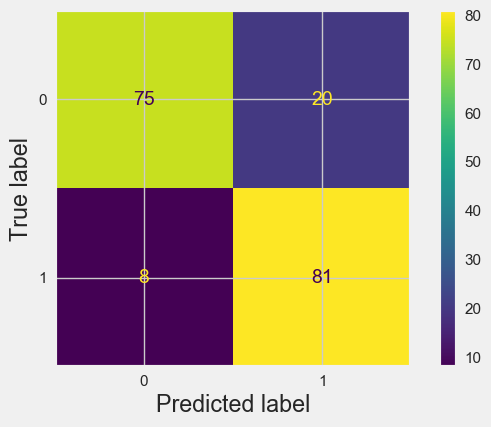

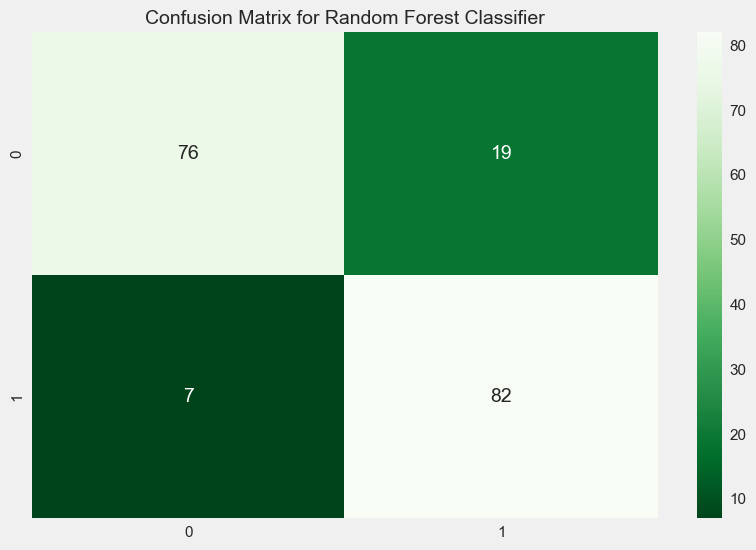

Random Forest Classifier Performace on the training data have an accuracy score of 83.0
Random Forest Classifier Performace on the testing data have an accuracy score of 86.0


In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100,max_features='auto', random_state = 101)
accuracy,con_metrix, cross_validation_score = do_prediction(rf)
plt.figure(figsize=(9,6))
sns.heatmap(con_metrix, annot=True, cmap='Greens_r')
plt.title('Confusion Matrix for Random Forest Classifier',size=14)
plt.show()
print('Random Forest Classifier Performace on the training data have an accuracy score of {}'.format((cross_validation_score *100).round()) )
print('Random Forest Classifier Performace on the testing data have an accuracy score of {}'.format((accuracy *100).round()) )

Decision Tree Classifier

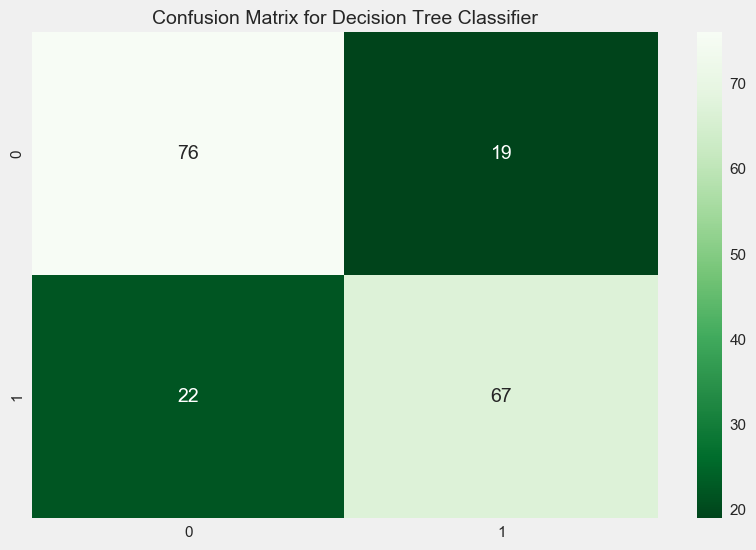

Decision Tree Classifier Performace on the training data have an accuracy score of 75.0
Decision Tree Classifier Performace on the testing data have an accuracy score of 78.0


In [30]:
from sklearn.tree import DecisionTreeClassifier
dc= DecisionTreeClassifier()
accuracy,con_metrix, cross_validation_score = do_prediction(dc)

plt.figure(figsize=(9,6))
sns.heatmap(con_metrix, annot=True, cmap='Greens_r')
plt.title('Confusion Matrix for Decision Tree Classifier',size=14)

plt.show()
print('Decision Tree Classifier Performace on the training data have an accuracy score of {}'.format((cross_validation_score *100).round()) )
print('Decision Tree Classifier Performace on the testing data have an accuracy score of {}'.format((accuracy *100).round()) )

In [31]:
from sklearn.tree import DecisionTreeClassifier
dc= DecisionTreeClassifier()
dc.fit(x_train,y_train)
pr=dc.predict(x_test)
from sklearn.metrics import classification_report,plot_confusion_matrix
print(classification_report(y_test,pr))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        95
           1       0.79      0.76      0.78        89

    accuracy                           0.79       184
   macro avg       0.79      0.79      0.79       184
weighted avg       0.79      0.79      0.79       184



In [32]:

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
#ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#ann.fit(x_train, y_train, batch_size = 32, epochs = 100)
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
#sns.heatmap(cm, annot=True, cmap='Greens_r')
#plt.show()


[[35 60]
 [61 28]]


0.3423913043478261